**1) Análisis Exploratorio de Datos**

Streaming output truncated to the last 5000 lines.
3742               Volkswagen Vento New Diesel Highline  2013         330000   
3743                             Maruti Swift Dzire VDI  2015         470000   
3744                                   Maruti Swift ZDi  2013         365000   
3745                             Hyundai EON Magna Plus  2013         250000   
3746                           Maruti Wagon R VXI BS IV  2017         430000   
3747                                   Maruti Swift VDI  2013         400000   
3748                             Maruti Swift Dzire ZXI  2015         615000   
3749                          Ford Figo Diesel Titanium  2011         150000   
3750                               Ford Figo Diesel ZXI  2014         240000   
3751                      Mahindra Scorpio S10 7 Seater  2014         800000   
3752                         Hyundai EON LPG Magna Plus  2015         240000   
3753                  Ford Ecosport 1.5 DV5 MT Titanium  2014        

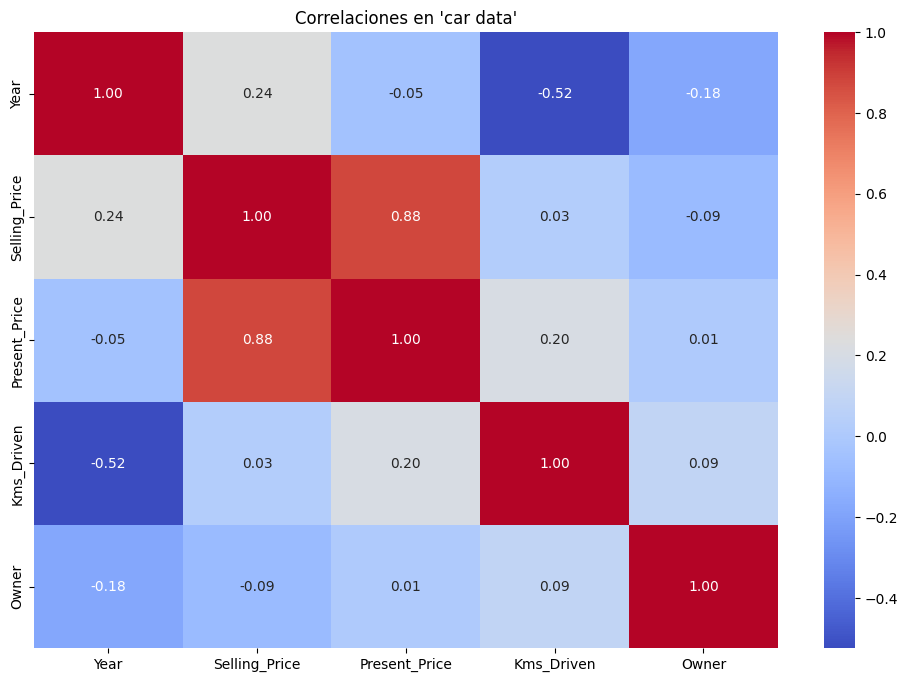

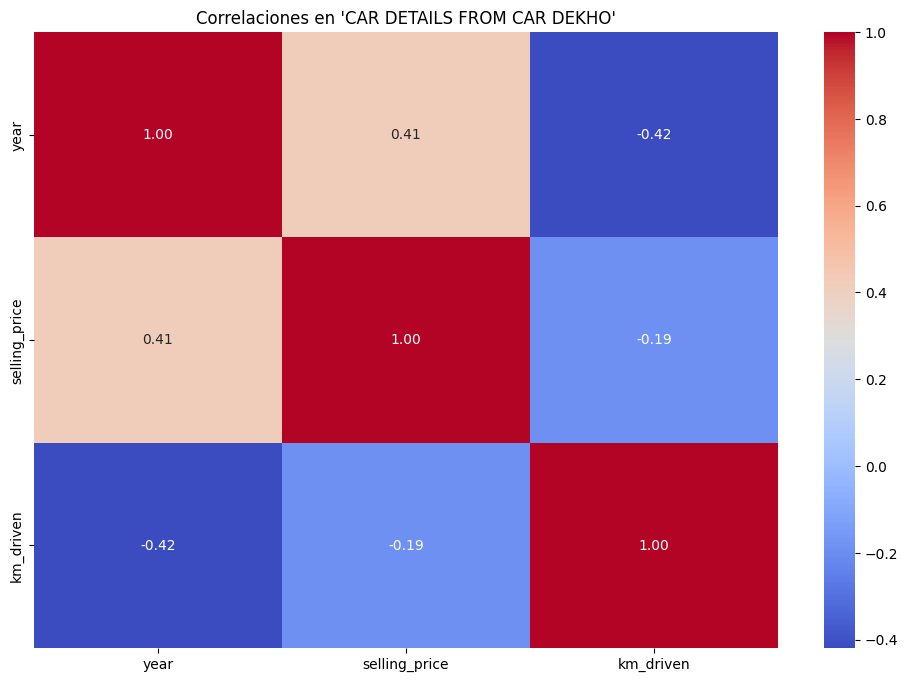

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


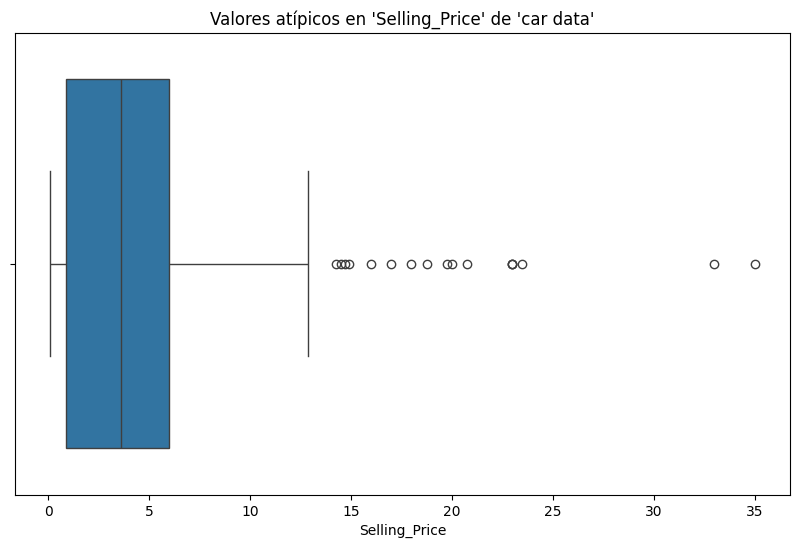

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


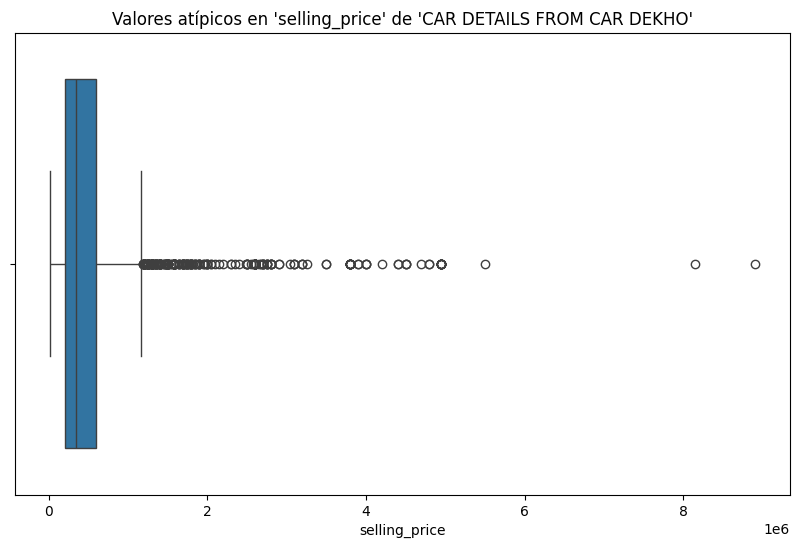

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


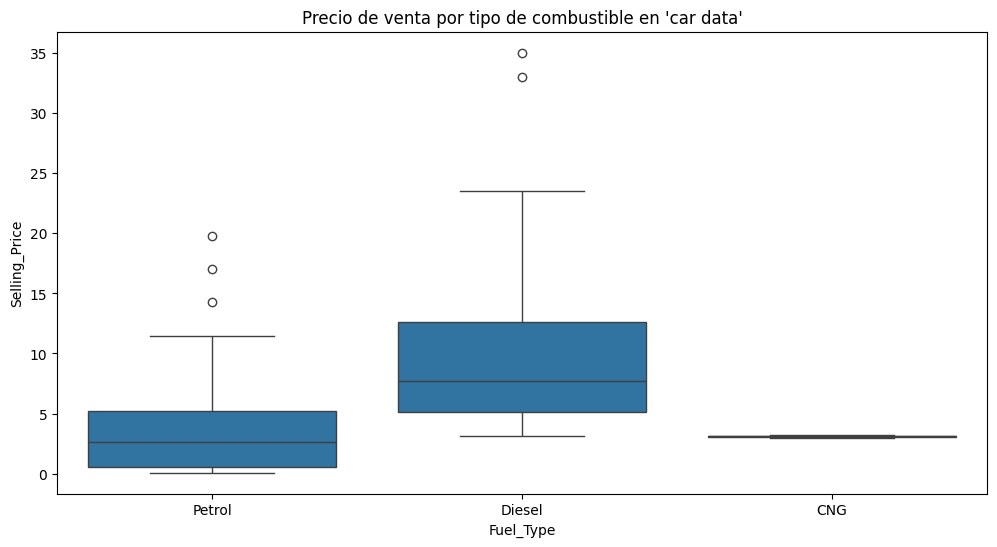

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


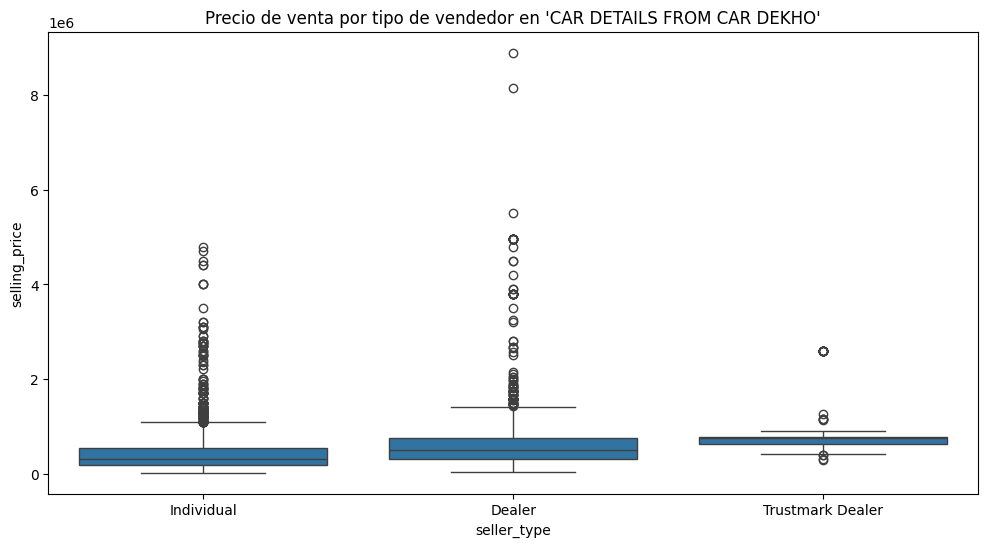

In [28]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
car_data = pd.read_csv('car data.csv')
car_dekho = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

# Mostrar todas las filas de cada dataset
print("Primeras filas de 'car data':")
print(car_data)

print("\nPrimeras filas de 'CAR DETAILS FROM CAR DEKHO':")
print(car_dekho)

# Verificar los nombres de las columnas
print("\nNombres de las columnas en 'car data':")
print(car_data.columns.tolist())
print("\nNombres de las columnas en 'CAR DETAILS FROM CAR DEKHO':")
print(car_dekho.columns.tolist())

# Limpiar espacios en los nombres de las columnas
car_data.columns = car_data.columns.str.strip()
car_dekho.columns = car_dekho.columns.str.strip()

# Verificar nuevamente los nombres de las columnas después de limpiar
print("\nNombres de las columnas después de limpiar en 'car data':")
print(car_data.columns.tolist())
print("\nNombres de las columnas después de limpiar en 'CAR DETAILS FROM CAR DEKHO':")
print(car_dekho.columns.tolist())

# Verificar si las columnas existen
if 'Selling_Price' in car_data.columns:
    print("\n'Selling_Price' existe en 'car data'")
else:
    print("\n'Selling_Price' NO existe en 'car data'")

if 'selling_price' in car_dekho.columns:
    print("'selling_price' existe en 'CAR DETAILS FROM CAR DEKHO'")
else:
    print("'selling_price' NO existe en 'CAR DETAILS FROM CAR DEKHO'")

# Limpiar y convertir columnas a tipo numérico en car_data si existe
if 'Selling_Price' in car_data.columns:
    car_data['Selling_Price'] = pd.to_numeric(car_data['Selling_Price'], errors='coerce')

if 'Kms_Driven' in car_data.columns:
    # Asegurarse de que Kms_Driven sea tipo string antes de aplicar str.replace
    car_data['Kms_Driven'] = car_data['Kms_Driven'].astype(str).str.replace(' km', '').str.replace(',', '').astype(float)

# Limpiar y convertir columnas a tipo numérico en car_dekho si existe
if 'selling_price' in car_dekho.columns:
    car_dekho['selling_price'] = pd.to_numeric(car_dekho['selling_price'].astype(str).str.replace('₹', '').str.replace(',', ''), errors='coerce')

if 'km_driven' in car_dekho.columns:
    # Asegurarse de que km_driven sea tipo string antes de aplicar str.replace
    car_dekho['km_driven'] = car_dekho['km_driven'].astype(str).str.replace(' km', '').str.replace(',', '').astype(float)

# Verificar la conversión
print("\nTipos de datos en 'car data':")
print(car_data.dtypes)
print("\nTipos de datos en 'CAR DETAILS FROM CAR DEKHO':")
print(car_dekho.dtypes)

# Análisis descriptivo
print("\nDescripción estadística de 'car data':")
print(car_data.describe())
print("\nDescripción estadística de 'CAR DETAILS FROM CAR DEKHO':")
print(car_dekho.describe())

# Correlaciones entre variables numéricas
# Solo considerar columnas numéricas
correlation_car_data = car_data.select_dtypes(include='number').corr()
correlation_car_dekho = car_dekho.select_dtypes(include='number').corr()

# Visualización de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_car_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlaciones en 'car data'")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_car_dekho, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlaciones en 'CAR DETAILS FROM CAR DEKHO'")
plt.show()

# Visualización de valores atípicos en 'Selling_Price'
if 'Selling_Price' in car_data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Selling_Price', data=car_data)
    plt.title("Valores atípicos en 'Selling_Price' de 'car data'")
    plt.show()

if 'selling_price' in car_dekho.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='selling_price', data=car_dekho)
    plt.title("Valores atípicos en 'selling_price' de 'CAR DETAILS FROM CAR DEKHO'")
    plt.show()

# Comparar precios de venta según el tipo de combustible en 'car data'
if 'Fuel_Type' in car_data.columns and 'Selling_Price' in car_data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
    plt.title("Precio de venta por tipo de combustible en 'car data'")
    plt.show()

# Comparar precios de venta según el tipo de vendedor en 'car_dekho'
if 'seller_type' in car_dekho.columns and 'selling_price' in car_dekho.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='seller_type', y='selling_price', data=car_dekho)
    plt.title("Precio de venta por tipo de vendedor en 'CAR DETAILS FROM CAR DEKHO'")
    plt.show()


**2) Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario**

In [29]:
# Leer todos los datos de los archivos CSV
car_data = pd.read_csv('car data.csv')
car_dekho = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

# Limpiar 'car_data'
# Convertir Selling_Price y Present_Price a tipo numérico
car_data['Selling_Price'] = pd.to_numeric(car_data['Selling_Price'], errors='coerce')
car_data['Present_Price'] = pd.to_numeric(car_data['Present_Price'], errors='coerce')

# Asegurarse de que Kms_Driven sea tratado correctamente
car_data['Kms_Driven'] = car_data['Kms_Driven'].astype(str).str.replace(' km', '').str.replace(',', '').astype(float)

# Manejo de valores faltantes en car_data solo para columnas numéricas
numeric_cols_car_data = car_data.select_dtypes(include=['float64', 'int64']).columns
car_data[numeric_cols_car_data] = car_data[numeric_cols_car_data].fillna(car_data[numeric_cols_car_data].mean())

# Limpiar 'car_dekho'
# Convertir precios y kilómetros a tipo numérico
car_dekho['selling_price'] = pd.to_numeric(car_dekho['selling_price'], errors='coerce')
car_dekho['km_driven'] = pd.to_numeric(car_dekho['km_driven'], errors='coerce')

# Manejo de valores faltantes en car_dekho solo para columnas numéricas
numeric_cols_car_dekho = car_dekho.select_dtypes(include=['float64', 'int64']).columns
car_dekho[numeric_cols_car_dekho] = car_dekho[numeric_cols_car_dekho].fillna(car_dekho[numeric_cols_car_dekho].mean())

# Convertir columnas categóricas a tipo de categoría
categorical_columns_car_data = ['Fuel_Type', 'Seller_Type', 'Transmission']
categorical_columns_car_dekho = ['fuel', 'seller_type', 'transmission', 'owner']

for col in categorical_columns_car_data:
    car_data[col] = car_data[col].astype('category')

for col in categorical_columns_car_dekho:
    car_dekho[col] = car_dekho[col].astype('category')

# Mostrar las primeras 5 filas, 5 puntos suspensivos y las últimas 5 filas
print("Datos preprocesados de car_data:")
print(pd.concat([car_data.head(), pd.DataFrame([["..."] * len(car_data.columns)], columns=car_data.columns), car_data.tail()]))

print("\nDatos preprocesados de CAR DETAILS FROM CAR DEKHO:")
print(pd.concat([car_dekho.head(), pd.DataFrame([["..."] * len(car_dekho.columns)], columns=car_dekho.columns), car_dekho.tail()]))

Datos preprocesados de car_data:
    Car_Name  Year Selling_Price Present_Price Kms_Driven Fuel_Type  \
0       ritz  2014          3.35          5.59    27000.0    Petrol   
1        sx4  2013          4.75          9.54    43000.0    Diesel   
2       ciaz  2017          7.25          9.85     6900.0    Petrol   
3    wagon r  2011          2.85          4.15     5200.0    Petrol   
4      swift  2014           4.6          6.87    42450.0    Diesel   
0        ...   ...           ...           ...        ...       ...   
296     city  2016           9.5          11.6    33988.0    Diesel   
297     brio  2015           4.0           5.9    60000.0    Petrol   
298     city  2009          3.35          11.0    87934.0    Petrol   
299     city  2017          11.5          12.5     9000.0    Diesel   
300     brio  2016           5.3           5.9     5464.0    Petrol   

    Seller_Type Transmission Owner  
0        Dealer       Manual     0  
1        Dealer       Manual     0  
2  

**3) Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.**

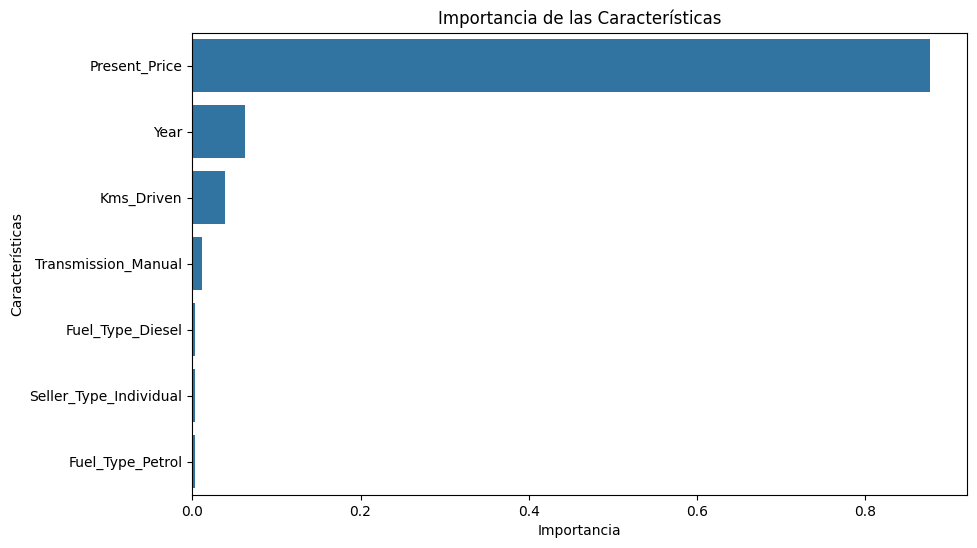

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Leer todos los datos de los archivos CSV
car_data = pd.read_csv('car data.csv')
car_dekho = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

# Limpiar 'car_data'
car_data['Selling_Price'] = pd.to_numeric(car_data['Selling_Price'], errors='coerce')
car_data['Present_Price'] = pd.to_numeric(car_data['Present_Price'], errors='coerce')

car_data['Kms_Driven'] = car_data['Kms_Driven'].astype(str).str.replace(' km', '').str.replace(',', '').astype(float)

numeric_cols_car_data = car_data.select_dtypes(include=['float64', 'int64']).columns
car_data[numeric_cols_car_data] = car_data[numeric_cols_car_data].fillna(car_data[numeric_cols_car_data].mean())

# Limpiar 'car_dekho'
car_dekho['selling_price'] = pd.to_numeric(car_dekho['selling_price'], errors='coerce')
car_dekho['km_driven'] = pd.to_numeric(car_dekho['km_driven'], errors='coerce')

numeric_cols_car_dekho = car_dekho.select_dtypes(include=['float64', 'int64']).columns
car_dekho[numeric_cols_car_dekho] = car_dekho[numeric_cols_car_dekho].fillna(car_dekho[numeric_cols_car_dekho].mean())

categorical_columns_car_data = ['Fuel_Type', 'Seller_Type', 'Transmission']
categorical_columns_car_dekho = ['fuel', 'seller_type', 'transmission', 'owner']

for col in categorical_columns_car_data:
    car_data[col] = car_data[col].astype('category')

for col in categorical_columns_car_dekho:
    car_dekho[col] = car_dekho[col].astype('category')

# Definir la variable objetivo y las características
X = car_data[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission']]
y = car_data['Selling_Price']

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
importance = model.feature_importances_

# Crear un DataFrame para visualizar la importancia
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


**4. Dividir el dataset en Train y Test para evaluar correctamente el modelo**

In [4]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo y las características
X = car_data[['Present_Price', 'Year', 'Kms_Driven']]  # Características relevantes
y = car_data['Selling_Price']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos resultantes
print("Dimensiones del conjunto de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nDimensiones del conjunto de prueba:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Dimensiones del conjunto de entrenamiento:
X_train: (240, 3)
y_train: (240,)

Dimensiones del conjunto de prueba:
X_test: (61, 3)
y_test: (61,)


**5. Entrenar el modelo configurando los diferentes hiperparámetros.**

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Leer todos los datos de los archivos CSV
car_data = pd.read_csv('car data.csv')
car_dekho = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

# Limpiar 'car_data'
car_data['Selling_Price'] = pd.to_numeric(car_data['Selling_Price'], errors='coerce')
car_data['Present_Price'] = pd.to_numeric(car_data['Present_Price'], errors='coerce')

car_data['Kms_Driven'] = car_data['Kms_Driven'].astype(str).str.replace(' km', '').str.replace(',', '').astype(float)

numeric_cols_car_data = car_data.select_dtypes(include=['float64', 'int64']).columns
car_data[numeric_cols_car_data] = car_data[numeric_cols_car_data].fillna(car_data[numeric_cols_car_data].mean())

# Limpiar 'car_dekho'
car_dekho['selling_price'] = pd.to_numeric(car_dekho['selling_price'], errors='coerce')
car_dekho['km_driven'] = pd.to_numeric(car_dekho['km_driven'], errors='coerce')

numeric_cols_car_dekho = car_dekho.select_dtypes(include=['float64', 'int64']).columns
car_dekho[numeric_cols_car_dekho] = car_dekho[numeric_cols_car_dekho].fillna(car_dekho[numeric_cols_car_dekho].mean())

# Convertir columnas categóricas a tipo de categoría
categorical_columns_car_data = ['Fuel_Type', 'Seller_Type', 'Transmission']
categorical_columns_car_dekho = ['fuel', 'seller_type', 'transmission', 'owner']

for col in categorical_columns_car_data:
    car_data[col] = car_data[col].astype('category')

for col in categorical_columns_car_dekho:
    car_dekho[col] = car_dekho[col].astype('category')

# Definir la variable objetivo y las características
X = car_data[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission']]
y = car_data['Selling_Price']

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

# 4. Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Crear y entrenar el modelo configurando hiperparámetros
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
importance = model.feature_importances_


# Evaluación del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 0.96
R^2 Score: 0.96


**6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.**

In [13]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print("Evaluación del Modelo en el Conjunto de Test:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Evaluación del Modelo en el Conjunto de Test:
Mean Absolute Error (MAE): 0.64
Mean Squared Error (MSE): 0.96
Root Mean Squared Error (RMSE): 0.98
R² Score: 0.96


**Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.**

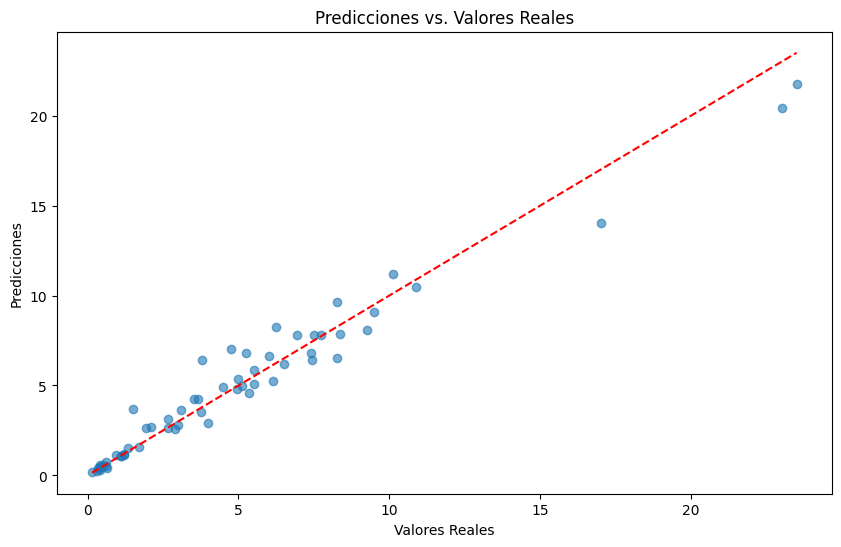

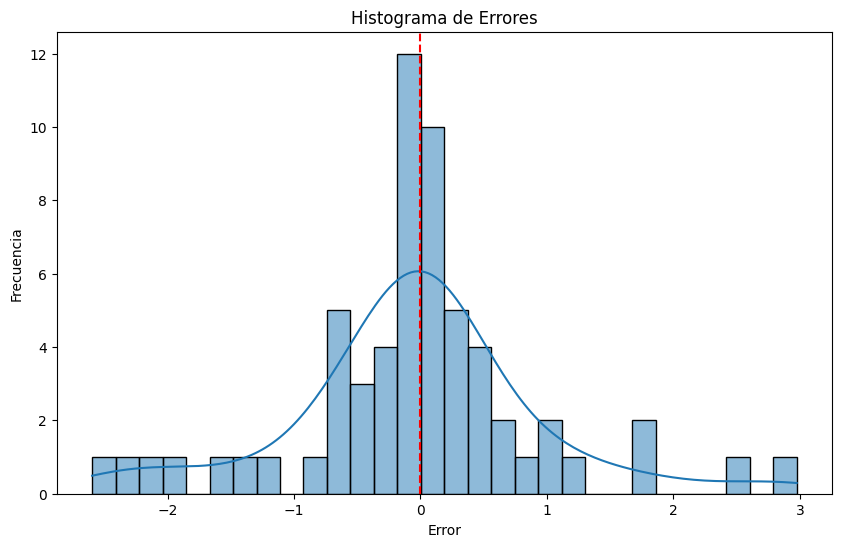

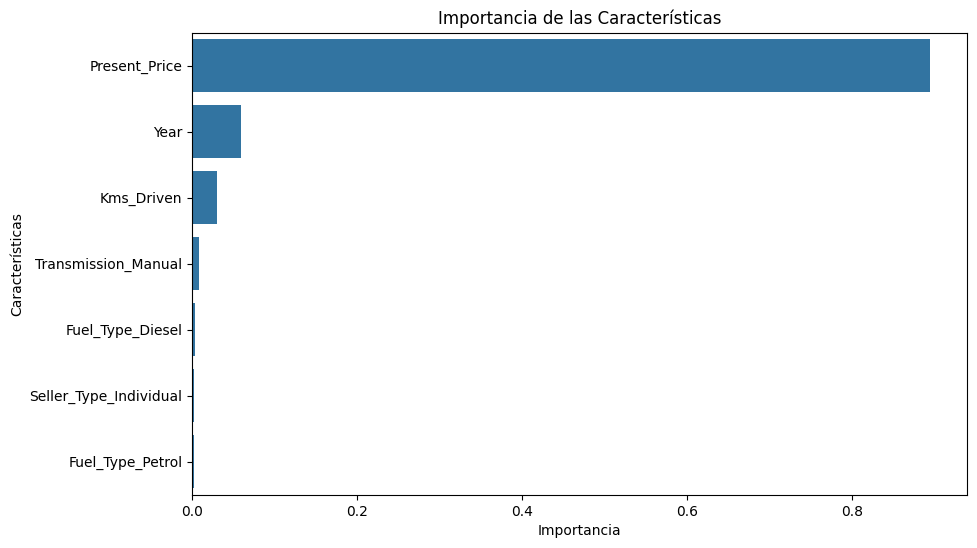

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 1. Gráfica de Predicciones vs. Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

# 2. Histograma de Errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Histograma de Errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--')  # Línea en x=0
plt.show()

# 3. Gráfica de Importancia de Características
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()
